# HW 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 5.1

Confidence: 8

In [ ]:
patients = pd.read_csv('patients.csv')

total_rows = len(patients)
unique_ids = patients['Id'].unique()

print(f"Total rows: {total_rows}")
print(f"Unique IDs: {len(unique_ids)}")

Total rows: 1163
Unique IDs: 1163


No, this dataset does not have any duplicate data.

# 5.2

Confidence: 7

In [ ]:
conditions = pd.read_csv('csv/conditions.csv')
medications = pd.read_csv('csv/medications.csv')

bronchitis_patients = conditions[conditions['DESCRIPTION'].str.contains('acute bronchitis', case=False, na=False)]['PATIENT'].unique()
print(bronchitis_patients)

<StringArray>
['c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8',
 'd488232e-bf14-4bed-08c0-a82f34b6a197',
 '23d16ee3-8cd4-eeb8-e77e-1e5fbf4c4159',
 'aade3c61-92bd-d079-9d28-0b2b7fde0fbb',
 'c0219ca9-576f-f7c2-9c44-de030e94969b',
 '61a2fcc0-d679-764c-7d86-b885b2c4907f',
 '97a20cf9-630d-939c-2f50-f13c434aee2f',
 '961f61f8-ed32-f113-8450-192064b49aa9',
 '9acc871f-b577-5530-b8ad-fa95b58cea25',
 '98e4223a-5ad8-94e0-2d73-ee5203dd4e2b',
 ...
 '76ddfad7-424d-d66a-30da-33c1ba147bc2',
 'ef010cf4-6db3-21c7-2c49-4435fe408745',
 '02df500c-4884-89ee-981c-e160dd1f6902',
 '9c532b25-cd38-f13a-f2de-2f5538326ed6',
 'cce90058-f5c7-79b8-1d70-aa6825e6089c',
 '236bc48b-5230-46f9-3725-a7b5274f4798',
 'b3ab4196-c646-5d1b-a25a-cc750abfc4bb',
 '41862157-5c14-f706-4a94-d2929be969e7',
 'cb328021-a854-dc94-e7ae-426580477308',
 'cb1b2c74-d1c5-997c-6f8b-20ca9f332eef']
Length: 454, dtype: str


In [4]:
meds = medications[medications['PATIENT'].isin(bronchitis_patients)]
meds['out_of_pocket'] = meds['BASE_COST'] - meds['PAYER_COVERAGE']
print(meds)

                      START                  STOP  \
2      2013-06-24T06:39:19Z  2013-07-02T06:39:19Z   
3      2016-02-27T08:52:29Z  2016-03-14T08:52:29Z   
4      2017-02-22T09:25:31Z  2017-06-02T09:25:31Z   
5      2020-02-06T09:25:31Z  2020-03-14T09:25:31Z   
6      2021-06-23T08:20:52Z                   NaN   
...                     ...                   ...   
56425  2018-12-19T05:11:58Z  2019-12-19T05:11:58Z   
56426  2019-12-19T05:11:58Z  2020-12-18T05:11:58Z   
56427  2020-12-18T05:11:58Z                   NaN   
56428  2020-12-28T02:11:58Z  2021-01-04T02:11:58Z   
56429  2020-12-28T02:11:58Z  2021-01-04T02:11:58Z   

                                    PATIENT  \
2      c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8   
3      c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8   
4      c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8   
5      c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8   
6      c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8   
...                                     ...   
56425  cb1b2c74-d1c5-997c-6f8b-20c

In [5]:
costs = meds.groupby('PATIENT')['out_of_pocket'].sum().reset_index()
costs = costs.merge(patients[['Id', 'FIRST', 'LAST']], left_on='PATIENT', right_on='Id', how='left')
costs['name'] = costs['FIRST'] + ' ' + costs['LAST']
print(costs['name'])

0        Tashia814 Boehm581
1      Keisha459 Kilback373
2       Ralph813 Kuhlman484
3            Vito638 Toy286
4       Tanner110 Hoeger474
               ...         
449     Glinda951 O'Keefe54
450     Colin861 Barrows492
451    Jeffery551 Brakus656
452      Caleb651 Nienow652
453       Rea30 Daugherty69
Name: name, Length: 454, dtype: str


In [6]:
print("Patients with acute bronchitis - Medication out-of-pocket costs:")
for _, row in costs.iterrows():
    print(f"{row['name']:40} ${row['out_of_pocket']:,.2f}")
print(f"Total number of patients: {len(costs)}")
print(f"Total out-of-pocket costs: ${costs['out_of_pocket'].sum():,.2f}")

Patients with acute bronchitis - Medication out-of-pocket costs:
Tashia814 Boehm581                       $314.20
Keisha459 Kilback373                     $358.99
Ralph813 Kuhlman484                      $691.22
Vito638 Toy286                           $5,102.35
Tanner110 Hoeger474                      $7.57
María Teresa440 Valadez233               $7,192.18
Tijuana228 Abbott774                     $120.21
Scarlett814 Breitenberg711               $514.37
Eloise59 Gerhold939                      $6,583.48
Regenia619 Gibson10                      $713.51
Maye976 Dickinson688                     $1,905.03
Eugene421 Heller342                      $756.66
Shanda945 Cremin516                      $276.06
Yuonne878 Dooley940                      $4,038.61
Ezequiel972 Gulgowski816                 $28.10
Abraham100 Koss676                       $153,965.64
Porsha375 Spencer878                     $8,562.92
Otha286 Wintheiser220                    $117.64
Hank686 Reichert620                     

# 5.3

Confidence: 7

In [8]:
careplans = pd.read_csv('csv/careplans.csv')

bronchitis_patients = conditions[conditions['DESCRIPTION'].str.contains('acute bronchitis', case=False, na=False)]['PATIENT'].unique()
plans = careplans[careplans['PATIENT'].isin(bronchitis_patients)]
plans = plans.dropna(subset=['STOP'])
plans['duration'] = (pd.to_datetime(plans['STOP']) - pd.to_datetime(plans['START'])).dt.days

print(plans.head(10))
print(plans['duration'])

                                      Id       START        STOP  \
1   73f93524-dc7c-ed80-8c0f-b12605033d9a  2013-06-24  2014-07-07   
2   fd741eee-5295-1185-8307-96cce2d592b4  2016-02-27  2016-03-14   
3   cb2fead4-d300-c0cb-4b87-c5869ba9ffba  2017-02-22  2017-06-02   
4   7f73e1a4-1bbb-bd5b-c478-09bf05e7fb36  2020-02-06  2020-03-14   
7   ff82270d-474e-b96b-3b8d-4119f4abc67b  2011-05-31  2012-01-31   
8   dbe3a59a-b610-2701-eab6-19cb772e3133  2018-09-27  2018-10-08   
9   e5197691-0013-5b28-7a87-81187656a259  2020-04-21  2020-11-17   
13  868cc5b5-04d6-3662-52f8-0a96f5c00a84  2013-03-26  2013-04-19   
14  28202e85-f8a5-270d-a458-a7f2d1f4a4df  2017-08-26  2017-09-06   
15  c7af4a61-b6d0-fce9-9ccd-21f21bdf1837  2013-06-23  2013-07-24   

                                 PATIENT  \
1   c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8   
2   c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8   
3   c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8   
4   c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8   
7   d488232e-bf14-4bed-08c0-a82

In [9]:
durations = plans.groupby('PATIENT')['duration'].sum().reset_index()
durations = durations.merge(patients[['Id', 'FIRST', 'LAST']], left_on='PATIENT', right_on='Id', how='left')
durations['name'] = durations['FIRST'] + ' ' + durations['LAST']

print(durations.head(10))

                                PATIENT  duration  \
0  00ae3b00-9500-efc1-2758-a93d3f77e650       316   
1  00c9ca99-6b9f-add4-8759-f7dfee6ea1a4        87   
2  0142b69f-57f0-9a08-4e2d-65a2b77fdea7        14   
3  02257002-550c-6de2-2bc0-0bb2bb497e84       295   
4  02b1604a-1bad-bc6f-5b72-d219ecd8f7f4        34   
5  02ceca12-357f-981e-dcf3-3d26d3c1ff82       890   
6  02df500c-4884-89ee-981c-e160dd1f6902        62   
7  0354da61-b0c8-3469-d3f6-c2fd0f508b7a       147   
8  03777c32-ed98-50e2-f75d-cbcad532c610       349   
9  03bb882e-730f-0d96-cd3d-3caee932fef6        80   

                                     Id            FIRST            LAST  \
0  00ae3b00-9500-efc1-2758-a93d3f77e650        Tashia814        Boehm581   
1  00c9ca99-6b9f-add4-8759-f7dfee6ea1a4        Keisha459      Kilback373   
2  0142b69f-57f0-9a08-4e2d-65a2b77fdea7         Ralph813      Kuhlman484   
3  02257002-550c-6de2-2bc0-0bb2bb497e84          Vito638          Toy286   
4  02b1604a-1bad-bc6f-5b72-d219ecd8f

In [10]:
print("Patients with acute bronchitis - Total care plan duration (days):")
for _, row in durations.iterrows():
    print(f"{row['name']:40} {row['duration']:>6} days")
print(f"Total number of patients: {len(durations)}")
print(f"Total duration of all care plans: {durations['duration'].sum()} days")

Patients with acute bronchitis - Total care plan duration (days):
Tashia814 Boehm581                          316 days
Keisha459 Kilback373                         87 days
Ralph813 Kuhlman484                          14 days
Vito638 Toy286                              295 days
Tanner110 Hoeger474                          34 days
María Teresa440 Valadez233                  890 days
Tijuana228 Abbott774                         62 days
Scarlett814 Breitenberg711                  147 days
Eloise59 Gerhold939                         349 days
Regenia619 Gibson10                          80 days
Maye976 Dickinson688                        887 days
Eugene421 Heller342                        1096 days
Shanda945 Cremin516                         916 days
Yuonne878 Dooley940                         371 days
Ezequiel972 Gulgowski816                    120 days
Abraham100 Koss676                          308 days
Porsha375 Spencer878                       6462 days
Otha286 Wintheiser220            

# 5.4

## 5.4.1

CLAIMID
0000582c-67db-ca12-dc5c-e5008a705540    20984.11
00007684-bc37-df1f-4c3d-8be8636a0c1b       25.17
00009d0c-a000-5263-7272-88aad3f53a09      100.00
00009f24-b8df-aac7-31c5-4e0c66ed181f       40.00
0000ca55-374b-dbd9-7b22-bc7c01df9be1       60.00
                                          ...   
fffd57ac-2402-f769-2f80-d14d73229f48     9144.45
fffe12a5-f538-34ca-9d12-046e09c4be9e     9838.26
fffe1fc0-4b71-4903-81bc-f0d9cf2c3e8a        0.02
ffffbe4f-a3f2-5ffe-e300-d0c0966ab56d      129.16
ffffc75c-0b0a-b5a6-705c-b67d031c330f      615.74
Name: PAYMENTS, Length: 117889, dtype: float64


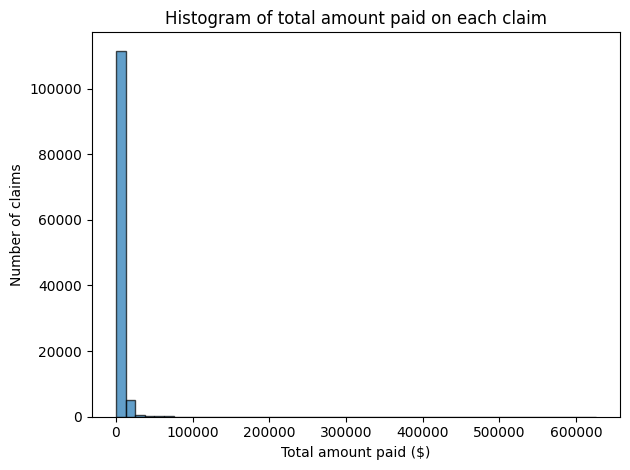

In [15]:
transactions = pd.read_csv('csv/claims_transactions.csv')
transactions['PAYMENTS'] = pd.to_numeric(transactions['PAYMENTS'], errors='coerce').fillna(0)
paid_per_claim = transactions.groupby('CLAIMID')['PAYMENTS'].sum()

print(paid_per_claim)

fig, ax = plt.subplots()
ax.hist(paid_per_claim, bins=50, edgecolor='black', alpha=0.7)
ax.set_xlabel('Total amount paid ($)')
ax.set_ylabel('Number of claims')
ax.set_title('Histogram of total amount paid on each claim')
#ax.set_xscale('log')
plt.tight_layout()
plt.show()

## 5.4.2

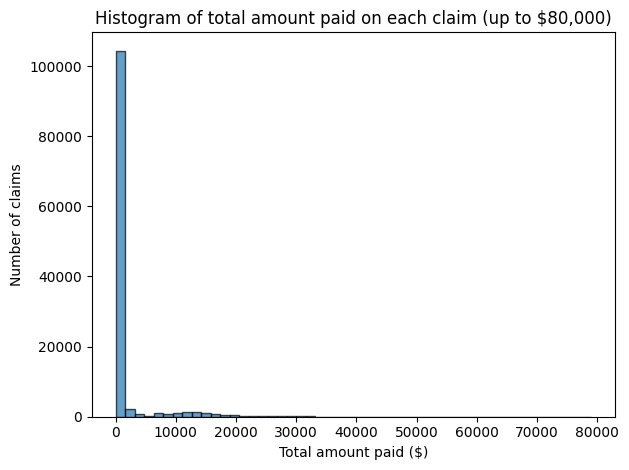

In [16]:
paid_up_to_80k = paid_per_claim[paid_per_claim <= 80000]

fig, ax = plt.subplots()
ax.hist(paid_up_to_80k, bins=50, edgecolor='black', alpha=0.7)
ax.set_xlabel('Total amount paid ($)')
ax.set_ylabel('Number of claims')
ax.set_title('Histogram of total amount paid on each claim (up to $80,000)')
plt.tight_layout()
plt.show()

# 5.5

Confidence: 7

**Investigation:** Average out-of-pocket healthcare expenses by race.

**Headline:** Healthcare Cost Burden Varies by Race in Synthetic Patient Data

**Why it matters:** Understanding how out-of-pocket costs differ across demographic groups helps identify potential disparities in coverage and affordability.

**Finding:** Grouping patients by RACE and computing mean HEALTHCARE_EXPENSES reveals variation in average out-of-pocket spending. The data dictionary's clear mapping of HEALTHCARE_EXPENSES (patient-paid) and HEALTHCARE_COVERAGE (payer-paid) enabled this equity-oriented query. While synthetic data does not reflect real-world disparities, the approach shows how a well-documented database supports exploratory analysis.

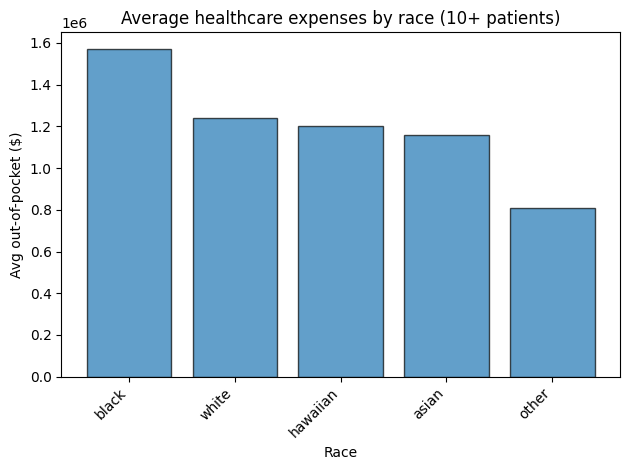

In [18]:
by_race = patients.groupby('RACE')['HEALTHCARE_EXPENSES'].agg(['mean', 'count']).reset_index()
by_race = by_race[by_race['count'] >= 10].sort_values('mean', ascending=False)

fig, ax = plt.subplots()
ax.bar(by_race['RACE'], by_race['mean'], edgecolor='black', alpha=0.7)
ax.set_xlabel('Race')
ax.set_ylabel('Avg out-of-pocket ($)')
ax.set_title('Average healthcare expenses by race (10+ patients)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5.6

In [19]:
import duckdb

conn = duckdb.connect('hw5.db')

conn.execute("""
CREATE OR REPLACE TABLE patients (
    Id VARCHAR PRIMARY KEY,
    FIRST VARCHAR,
    LAST VARCHAR
)
""")

conn.execute("""
CREATE OR REPLACE TABLE conditions (
    PATIENT VARCHAR,
    DESCRIPTION VARCHAR
)
""")

conn.execute("""
CREATE OR REPLACE TABLE medications (
    PATIENT VARCHAR,
    BASE_COST DOUBLE,
    PAYER_COVERAGE DOUBLE
)
""")

conn.execute("""
INSERT INTO patients SELECT Id, FIRST, LAST FROM read_csv_auto('csv/patients.csv')
""")

conn.execute("""
INSERT INTO conditions SELECT PATIENT, DESCRIPTION FROM read_csv_auto('csv/conditions.csv')
""")

conn.execute("""
INSERT INTO medications SELECT PATIENT, BASE_COST, PAYER_COVERAGE FROM read_csv_auto('csv/medications.csv')
""")

q = """
SELECT
    p.FIRST || ' ' || p.LAST AS patient_name,
    SUM(m.BASE_COST - m.PAYER_COVERAGE) AS out_of_pocket
FROM conditions c
JOIN medications m ON c.PATIENT = m.PATIENT
JOIN patients p ON c.PATIENT = p.Id
WHERE c.DESCRIPTION ILIKE '%acute bronchitis%'
GROUP BY c.PATIENT, p.FIRST, p.LAST
"""

rows = conn.execute(q).fetchall()
print("Patients with acute bronchitis - Medication out-of-pocket costs:")
print("=" * 70)
for name, cost in rows:
    print(f"{name:40} ${cost:,.2f}")
print("=" * 70)
print(f"Total number of patients: {len(rows)}")
print(f"Total out-of-pocket costs: ${sum(r[1] for r in rows):,.2f}")

conn.close()

Patients with acute bronchitis - Medication out-of-pocket costs:
Delfina519 Parisian75                    $397.72
Erna640 Robel940                         $2,555.14
Christal240 Glover433                    $4,569.07
Maye976 Dickinson688                     $1,905.03
Lashawnda573 O'Hara248                   $1,446.17
Alexander630 Robel940                    $141.64
Werner409 Schneider199                   $340,937.32
Javier97 Greenfelder433                  $1,965.42
Jenifer459 Abshire638                    $68.93
Evita885 Hessel84                        $418.56
David908 Heidenreich818                  $42,837.82
Cher186 Becker968                        $482.49
Robin66 Reichel38                        $6,870.25
Bridgette172 Schuppe920                  $4.68
Gus973 Roob72                            $21.95
Sylvia544 Collins926                     $12.25
Elton404 Homenick806                     $6.60
Bernard308 Walsh511                      $2,990.62
Allyson474 Gibson10                    

### 5.6.2 Short answer

**1. Describe the difference between working in pandas and SQL.**

Pandas operates on in-memory DataFrames in Python. You load data into memory, then use method chaining, indexing, and filters to transform it. SQL operates on relational databases: you write declarative queries (`SELECT`, `JOIN`, `GROUP BY`, etc.) that the database engine executes, often with data stored on disk rather than fully in memory.

**2. Which do you think is better and why? (for this problem)**

Pandas is better for this problem. The data is small enough to fit in memory, the CSVs are already loaded, and results are easy to format and iterate over for printing. There’s no need for a separate database or query language here.

**3. What would it take for that answer to change?**

SQL would be preferable if the data were much larger, shared across many users, or accessed by other tools. In that case, using a database would give you persistence, indexing, and the ability to avoid loading everything into memory at once.

# 5.7

Confidence: 8

**1. Metadata** — Data that describes other data. It includes things like column names, data types, units, creation date, and source. Metadata provides context so others can understand, interpret, and reuse the data.

**2. Data Dictionary** — A document or catalog that defines each field in a dataset: what it means, its type, valid values, units, and how it relates to other fields. It maps primary/foreign keys and explains the schema.

**3. Established Data** — Data that has been collected, validated, and documented for ongoing use. It may come from official sources, research, or institutional records and is typically stable enough to support analysis or decision-making.

**4. FAIR vs. CARE** — FAIR (Findable, Accessible, Interoperable, Reusable) focuses on making data machine-readable and shareable across systems. CARE (Collective benefit, Authority to control, Responsibility, Ethics) emphasizes Indigenous data sovereignty and the rights of data subjects over how their data is used.

**5. Context** — The circumstances, background, or setting in which data was collected and used. Context includes who created it, when, why, and under what conditions. It helps users interpret data correctly and avoid misuse.

**6. Provenance vs. DMP** — Provenance is the origin and history of data: who created it, when, how, and what transformations were applied. A DMP (Data Management Plan) is a written plan for how data will be collected, stored, shared, and preserved during and after a project.

**7. License** — Legal terms that specify how data can be used, shared, modified, or redistributed. Examples range from open (e.g., CC BY) to restricted or proprietary. A license clarifies reuse rights and obligations.

**8. Internal/Embedded vs. External** — Internal or embedded metadata is stored in the same file as the data (e.g., column headers in a CSV). External metadata is stored separately in a catalog, database, or documentation file. Embedded metadata travels with the data; external metadata must be kept in sync.

# 5.8

Confidence: 8

5.8.1 A
5.8.2 C
5.8.3 D
5.8.4 A
5.8.5 B
5.8.6 C
5.8.7 D
5.8.8 A
5.8.9 D
5.8.10 D